<h4 align='center'><strong>Image Recognition using Neural Networks and GPU/CPU Benchmarking</strong></h4>

Importing Dependancies

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np

Loading the Data

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

<i>We have 50000 training images and 10000 test images</i>

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

<i>y_train is a 2D array, but for our purpose we require 1D array to feed the neurons. So we will convert y_train into a 1D array</i>

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

<i>Similarly we convert y_test into 1D array</i>

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
# defining the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Data Visualization

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

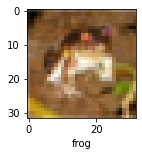

In [10]:
plot_sample(X_train, y_train, 0)

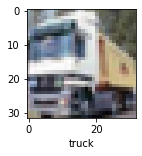

In [11]:
plot_sample(X_train, y_train, 1)

Data Preprocessing

<i>Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0 to 1 range, we need to divide it by 255. Normalization increases the accuracy of the model</i>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4><strong>Building an Artificial Neural Network for Image Classification</strong></h4>

In [13]:
def get_model():
    ann = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='softmax')    
        ])

    ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ann

GPU/CPU Benchmarking and Classification Report

In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
tf.test.is_built_with_cuda()

True

<i>Training on CPU - Ryzen 7 5800h</i>

In [16]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8116 - accuracy: 0.3564
Epoch 2/20
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6230 - accuracy: 0.4280
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5380 - accuracy: 0.4567
Epoch 4/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4794 - accuracy: 0.4805
Epoch 5/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4315 - accuracy: 0.4955
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3859 - accuracy: 0.5127
Epoch 7/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3492 - accuracy: 0.5271
Epoch 8/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3146 - accuracy: 0.5385
Epoch 9/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2835 - accuracy: 0.5491
Epoch 10/20
1563/1563 [==============================] - 53s 34m

<i>Training on GPU - Nvidia RTX 3060</i>

In [17]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train, epochs=20)
    
    # for classification report
    y_pred = gpu_model.predict(X_test)
    y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/20
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8092 - accuracy: 0.3564
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6206 - accuracy: 0.4300
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5416 - accuracy: 0.4558
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4825 - accuracy: 0.4776
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4317 - accuracy: 0.4965
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3907 - accuracy: 0.5127
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3532 - accuracy: 0.5281
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3168 - accuracy: 0.5401
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2850 - accuracy: 0.5483
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.253

Here is the performance comparison for training time of 20 epoch on CPU and GPU.

| Epoch | CPU | GPU  |
|:------|:------|:------|
| 20 | 17 min 52 sec | 1 min 37 sec |

In this case, we can see that GPU training is almost 11 times faster than CPU training. 

<i>With ANN, we get an accuracy of 66% at the end of 20 epochs.</i>

<h4><strong>Building a Convolutional Neural Network for Image classification</strong></h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4537 - accuracy: 0.4766
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1073 - accuracy: 0.6127
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9839 - accuracy: 0.6570
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9040 - accuracy: 0.6853
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8361 - accuracy: 0.7094
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7844 - accuracy: 0.7297
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7361 - accuracy: 0.7451
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6945 - accuracy: 0.7579
Epoch 9/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6531 - accuracy: 0.7729
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.61

Classification Report

In [19]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.80      0.72      1000
           1       0.80      0.78      0.79      1000
           2       0.65      0.50      0.57      1000
           3       0.44      0.58      0.50      1000
           4       0.64      0.60      0.62      1000
           5       0.59      0.55      0.57      1000
           6       0.73      0.76      0.74      1000
           7       0.69      0.76      0.72      1000
           8       0.85      0.72      0.78      1000
           9       0.83      0.71      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<i>With CNN, at the end 20 epochs, the accuracy is around 88% which is a significant improvement over ANN. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.</i>